####DBSCAN - **D**ensity **B**ased **S**patial **C**lustering with **A**pplications of **N**oise
* Author : Sabari Murugan S
* GitHub : https://github.com/sabarimurugans47
* License: Educational use only. Please credit if reused.

In [487]:
import pandas as pd,matplotlib.pyplot as plt,numpy as np
%matplotlib inline
from scipy.spatial.distance import cdist
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

#### Created samples with some noise (outliers)

In [488]:
df=np.array([[ 0.52,  0.32],
 [ 1.03, -0.21],
 [ 0.17,  0.91],
 [-0.45,  0.48],
 [ 0.85, -0.47],
 [ 0.25,  0.65],
 [ 1.12, -0.15],
 [ 0.35,  0.78],
 [ 0.93, -0.38],
 [ 0.41,  0.59],
 [ 1.65, -0.17],
 [ 2.08,  0.41],
 [ 1.72, -0.42],
 [ 2.34,  0.56],
 [ 1.91, -0.31],
 [ 2.21,  0.38],
 [ 1.78, -0.49],
 [ 2.12,  0.62],
 [ 1.96, -0.27],
 [ 2.27,  0.45]])

In [489]:
data = pd.DataFrame(df, columns=['x1', 'x2'],index=['A','B','C','D','E','F','G','H','I','J','K','L','M',
                                                  'N','O','P','Q','R','S','T'])
data

,x1,x2
A,0.52,0.32
B,1.03,-0.21
C,0.17,0.91
D,-0.45,0.48
E,0.85,-0.47
F,0.25,0.65
G,1.12,-0.15
H,0.35,0.78
I,0.93,-0.38
J,0.41,0.59


#### Plot to see the distribution

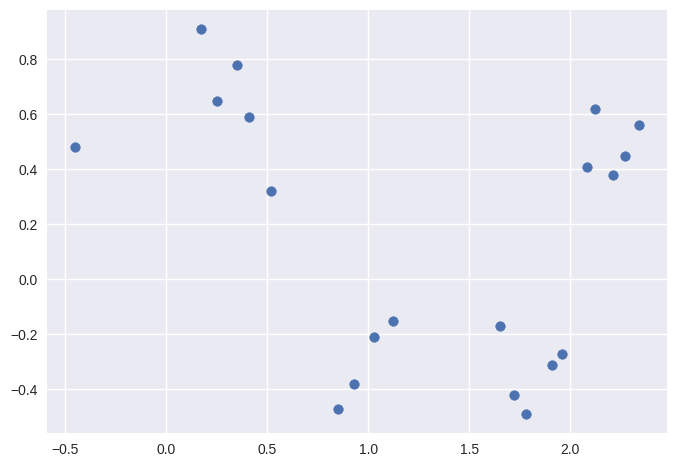

In [490]:
plt.scatter(data['x1'],data['x2'])
plt.show()

In [491]:
labels = list("ABCDEFGHIJKLMNOPQRST")
dist_matrix = cdist(data, data, metric='euclidean')
dist_matrix = np.round(dist_matrix, 2)
masked = np.where(np.triu(np.ones_like(dist_matrix), k=1).astype(bool), "", dist_matrix)
df_dist = pd.DataFrame(masked, index=labels, columns=labels)

#### Form Euclidean distance matrix for each sample to all samples.

In [492]:
df_dist

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T
A,0.0,,,,,,,,,,,,,,,,,,,
B,0.74,0.0,,,,,,,,,,,,,,,,,,
C,0.69,1.41,0.0,,,,,,,,,,,,,,,,,
D,0.98,1.63,0.75,0.0,,,,,,,,,,,,,,,,
E,0.86,0.32,1.54,1.61,0.0,,,,,,,,,,,,,,,
F,0.43,1.16,0.27,0.72,1.27,0.0,,,,,,,,,,,,,,
G,0.76,0.11,1.42,1.69,0.42,1.18,0.0,,,,,,,,,,,,,
H,0.49,1.2,0.22,0.85,1.35,0.16,1.21,0.0,,,,,,,,,,,,
I,0.81,0.2,1.5,1.63,0.12,1.23,0.3,1.3,0.0,,,,,,,,,,,
J,0.29,1.01,0.4,0.87,1.15,0.17,1.03,0.2,1.1,0.0,,,,,,,,,,


#### Implementing and initializing DBSCAN's params
* eps - Controls the radius
* min_samples - Controls how many samples to cover
* I going to initialize eps=0.3,min_samples=2.So the samples which are below 0.3 for their pair samples are considered as border cases

In [493]:
db=DBSCAN(eps=0.3,min_samples=2)
db.get_params()

{'algorithm': 'auto',
 'eps': 0.3,
 'leaf_size': 30,
 'metric': 'euclidean',
 'metric_params': None,
 'min_samples': 2,
 'n_jobs': None,
 'p': None}

In [494]:
labels = db.fit_predict(data)
labels

array([ 0,  1,  0, -1,  1,  0,  1,  0,  1,  0,  2,  3,  2,  3,  2,  3,  2,
        3,  2,  3])

In [495]:
silhouette_score(df,db.labels_)

np.float64(0.6546854814339534)

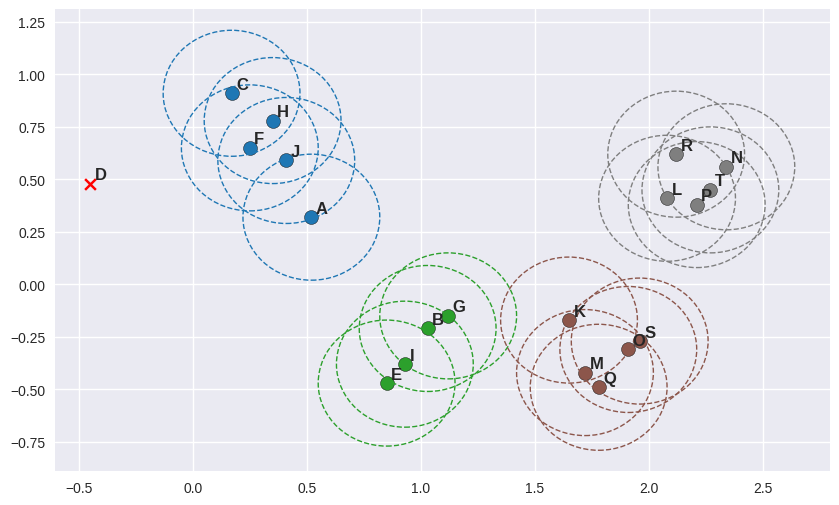

In [496]:
core_mask = np.zeros_like(labels, dtype=bool)
core_mask[db.core_sample_indices_] = True
point_labels = list("ABCDEFGHIJKLMNOPQRST")
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'red'
        marker = 'x'
    else:
        marker = 'o'
    mask = (labels == k)
    core_pts = df[mask & core_mask]
    border_pts = df[mask & ~core_mask]
    plt.scatter(core_pts[:, 0], core_pts[:, 1], c=[col], marker=marker, edgecolors='k', s=100, label=f'Cluster {k}' if k != -1 else 'Noise')
    for i, pt in enumerate(core_pts):
        circle = plt.Circle((pt[0], pt[1]), 0.3, color=col, fill=False, linestyle='--', linewidth=1)
        plt.gca().add_patch(circle)
    plt.scatter(border_pts[:, 0], border_pts[:, 1], c=[col], marker=marker, edgecolors='gray', s=60)
for i, (x, y) in enumerate(df):
    plt.text(x + 0.02, y + 0.02, point_labels[i], fontsize=12, weight='bold')
plt.show()

DBSCAN Summary (eps = 0.3, min_samples = 2)
* Each circle is a radius that we initialized as eps=0.3
* Border samples: These points are part of a cluster but not dense enough to be core points.
* They lie within the radius of a core point. → B, E, G, I, M, Q, S
* Noise samples: These points are not part of any cluster. DBSCAN labeled them as outliers. → D


---

